# Najbolj popularne pesmi

---


## Uvod

Pri projektni nalogi sem se osredotočila na analizo podatkov 100 najbolj popularnih pesmi v tednu 15. - 21. 10. 2021.
Podatke sem pridobila s pomočjo lestvice, dostopne na spletni strani [Rolling Stone](https://www.rollingstone.com/charts/songs/2021-10-18/).

Za vsako pesem sem zajela sledeče podatke:
- naslov in izvajalec pesmi,
- število tednov na lestvici,
- število predvajanj ("streams"),
- mesto, v katerem je pesem najbolj popularna (pri čemer se štejejo zgolj ameriška mesta),
- glasbena založba, s katero izvajalec sodeluje.

Podatke sem statistično obdelala ter analizirala njihovo soodvisnost glede na svoje delovne hipoteze:
- Ali bo imela pesem večje število predvajanj, če je več tednov na lestvici?
- Ali bodo na lestvici prevladovale pesmi, katerih izvajalci imajo pogodbe z glasbenimi založbami?

---


## Uvoz podatkov

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

pd.options.display.max_rows = 20

In [130]:
pesmi = pd.read_csv("pesmi.csv", index_col = "rank")
pesmi_z_rankom = pd.read_csv("pesmi.csv")

In [131]:
pesmi.columns = ["Naslov", "Pevec", "Št. tednov na lestvici", "Glasbena založba", "Top mesto", "Število predvajanj"]
pesmi

,Naslov,Pevec,Št. tednov na lestvici,Glasbena založba,Top mesto,Število predvajanj
rank,,,,,,
1,Easy on Me,Adele,1,Columbia Records,"Boston, MA (Manchester, NH)",44.7M
2,Stay,"The Kid LAROI, Justin Bieber",15,Columbia Records,"Pittsburgh, PA",16.9M
3,Industry Baby,"Lil Nas X, Jack Harlow",13,Columbia Records,"Pittsburgh, PA",17.5M
4,Fancy Like,Walker Hayes,18,Monument,"Pittsburgh, PA",13.7M
5,Way 2 Sexy,"Drake feat. Future, Young Thug",7,Republic/Cash Money,"Miami-Fort Lauderdale, FL",15.9M
...,...,...,...,...,...,...
96,Stupid/Asking,Young Thug,1,300 Entertainment,"Charlottesville, VA",4.4M
97,Yonaguni,Bad Bunny,20,ORCA,"Puerto Rico, PR",4.6M
98,Here We Go,Mac Miller,1,Warner Bros.,"Albuquerque-Santa Fe, NM",4.2M


Do sedaj narejene spremembe:
- v tabeli "pesmi" sem spremenila imena stolpcev, da so bolj berljivi (tednov_na_lestvici -> Št. tednov na lestvici, top_mesto -> Top mesto),
- za indeks vsake pesmi sem izbrala kar njihov rank na lestvici tisti teden.

Pesmi v razpredelnici so razporejene po vrsti tako, kot so bile razvrščene na spletni strani Rolling Stone: najbolj predvajana pesem tisti teden
je na vrhu lestvice, najmanj predvajana pesem tisti teden pa na dnu lestvice.

---


## Analiza podatkov

### Pesmi glede na mesta, v katerih so bila najbolj predvajana

Število pesmi sem razdelila padajoče glede na mesta, v katerem so bile pesmi v tistem tednu najpogosteje predvajane.

**Hipoteza**: Moja hipoteza je, da bo v mestih z večjim številom prebivalcev bilo več popularnih pesmi. Glede na graf se bo
torej populacija mesta manjšala v smeri x-osi.

<AxesSubplot:title={'center':'Število pesmi po mestih'}>

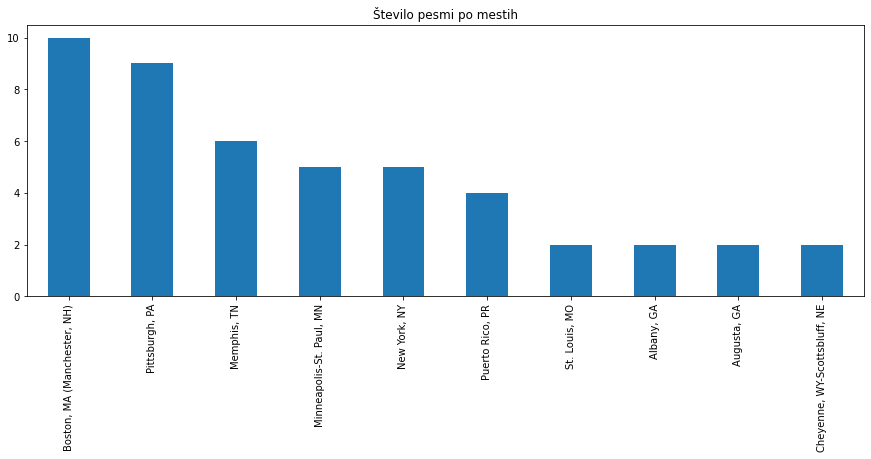

In [132]:
stevec_mest = pesmi["Top mesto"].value_counts()
stevec_mest[:10].plot.bar(figsize = (15, 5), title = "Število pesmi po mestih")

Po analizi prvih petnajstih mest sem opazila, da po "St. Louis, MO" število pesmi stagnira na 2 oziroma se zgolj zmanjša za 1.
Zaradi tega razloga sem se odličila za prikaz le prvih desetih mest, ki vodijo po številu pesmi.

Zato, da lahko potrdim ali ovržem svojo hipotezo pa si bom ogledala še število prebivalstva teh prvih desetih mest 
(glede na google, štetje prebivalstva leta 2019), pri čemer bom:
- za vodilno mesto ("Boston, MA (Manchester, NH)") zajela le populacijo bolj poseljenega mesta - Boston,
- pri četrtem mestu, "Minneapolis - St. Paul, MN" seštela populaciji obeh mest, saj je v statistiki na spletni strani
mišljeno združenje obeh mest,
- populacijo nehala šteti po "St. Louis, MO", saj število pesmi po tem mestu očitno stagnira.

Če se v spodnji tabeli populacija mest od zgoraj navzdol manjša, bo moja hipoteza potrjena, sicer ne.

| Mesto                      | Populacija |
| -------------------------- | ---------  |
| Boston, MA                 | 684 379    |
| Pittsburgh, PA             | 302 205    |
| Memphis, TN                | 651,932    |
| Minneapolis - St. Paul, MN | 724 871    |
| New York, NY               | 8 419 000  |
| Puerto Rico, PR            | 3 194 000  |
| St. Louis, MO              | 308 174    |

Glede na analizo tabele in primerjavo z zgornjim grafom lahko ovržemo hipotezo. Hkrati me je ob analizi mest presenetilo, da sta bila na seznamu zgolj
dve mesti z relativno visokim številom prebivalstva - Puerto Rico in New York. Čeprav iz danih podatkov ne moremo izluščiti nobene trdne teorije, lahko
iz prikazov bežno razberemo, kateri prebivalci ZDA so prekomerno navdušeni nad "pop" zvrstjo glasbe.

---


### Povezava z glasbenimi založbami

Število pesmi bom zdaj razdelila glede na založbe, s katerimi so izvajalci sodelovali ob izdaji določene pesmi.

Standard je, da izvajalec pogodbo podpiše zgolj z eno glasbeno založbo, vendar to ne drži vedno. Za primer si lahko vzamemo Adele,
ki je imela v izbranem tednu na lestvici pet pesmi. Štiri izmed teh so bile izdane v letu 2015, katerih glasbena založba je na lestvici
navedena kot "XL Recordings/Columbia". Njena peta pesem pa je bila izdana v istem tednu, kot je bila pisana ta lestvica. Založba, pod
katero je Adele izdala to pesem pa je "Columbia Records". Razlog, za ta pojav je, da je Adele do leta 2016 sodelovala predvsem z britansko
glasbeno založbo "XL Recordings". Z ameriško založbo "Columbia Records" je sodelovala zgolj, da so bile njene pesmi predvajane tudi po
ameriškem kontinentu. Po letu 2016 pa je podpisala pogodbo s "Columbia Records", torej od tedaj sodeluje striktno z njimi.
(*Vir: [hiperpovezava](https://en.wikipedia.org/wiki/Adele)*)

Zaradi tega pojava se zna zgoditi, da bo kateri izvajale pogosto asociiran z več kot eno glasbeno založbo. Zaradi tega se v tej
analizi podatkov ne bom osredotočila na iskanje odvisnosti/povezanosti med izvajalcem in glasbeno založbo, čeprav je po večini
pričakovano, da ima en izvajalec eno založbo.

**Hipoteza**: Najbolj popularne ameriške glasbene založbe bodo imele največ popularnih pesmi.

<AxesSubplot:title={'center':'Število pesmi po glasbenih založbah'}>

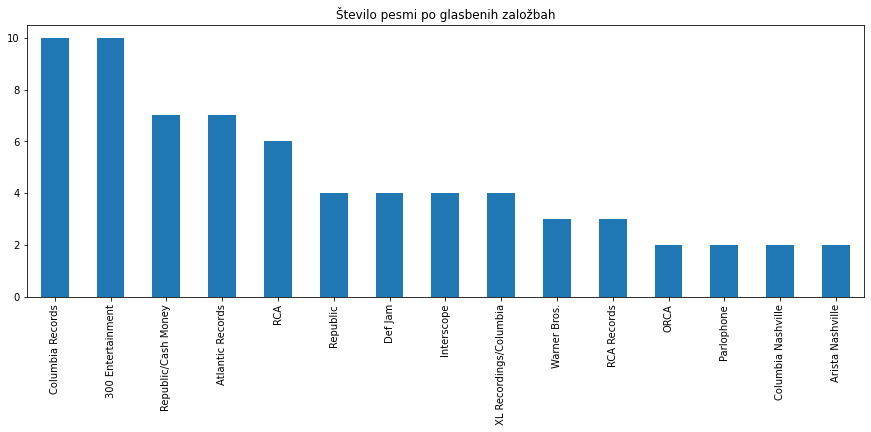

In [133]:
stevec_zalozb = pesmi["Glasbena založba"].value_counts()
stevec_zalozb[:15].plot.bar(figsize = (15, 5), title = "Število pesmi po glasbenih založbah")

Za ta odsek analize lahko svojo hipotezo potrdim. Glede na [že znane podatke](https://www.dailymusicroll.com/entertainment/the-top-10-record-labels-in-the-current-american-music-industry.html) je večina glavnih glasbenih založb pod okriljem treh glavnih "večjih založb", ki pod seboj združujejo manjše,
na zvrst osredotočene glasbene založbe.

Na zgornjem grafu so vse razen glasbene založbe "ORCA", ki je osredotočena na inozemske izvajalce, pod okriljem
ene izmed treh glavnih glasbenih založb:
- **Universal**: Republic, Def Jam, Interscope;
- **Warner**: 300 Entertainment, Atlantic Records, Warner Bros, Parlophone;
- **Sony**: Columbia Records, RCA (Recordings), Columbia Nashville, Arista Nashville.

Pričakovano je tudi, da imajo "lokalne" glasbene založbe (npr. Columbia Nashville, Arista Nashville) manj popularnih
pesmi kot globalne (npr. Columbia Records, 300 Entertainment).

---


**Hipoteza**: Na lestvici bodo prevladovale pesmi, katerih izvajalci imajo podpisane pogodbe z glasbenimi založbami.

Oglejmo si število popularnih pesmi, katerih izvajalci so bili samostojni:

In [134]:
pesmi[pesmi["Glasbena založba"].isnull()]

,Naslov,Pevec,Št. tednov na lestvici,Glasbena založba,Top mesto,Število predvajanj
rank,,,,,,
9,Who Want Smoke?,"Nardo Wick feat. G Herbo, Lil Durk, 21 Savage",2,NaN,"Chicago, IL",13.3M
14,Pissed Me Off,Lil Durk,1,NaN,"New Orleans, LA",10.6M
22,Cold Heart,"Elton John, Dua Lipa, PNAU",5,NaN,"Boston, MA (Manchester, NH)",7.2M
29,Ex For A Reason,"Summer Walker, City Girls",1,NaN,"Memphis, TN",7M
30,Buy Dirt,Jordan Davis feat. Luke Bryan,11,NaN,"Minneapolis-St. Paul, MN",6.7M
37,Wfm,Realestk,2,NaN,"Columbia, SC",6.9M
42,You Should Probably Leave,Chris Stapleton,6,NaN,"Cincinnati, OH",6M
43,Blinding Lights,The Weeknd,99,NaN,"Miami-Fort Lauderdale, FL",6.2M
45,Lo Siento BB:/,"Tainy, Julieta Venegas, Bad Bunny",2,NaN,"Puerto Rico, PR",6.3M


In [135]:
len(pesmi[pesmi["Glasbena založba"].isnull()])

13

In [136]:
100 - 13

87

Ker imamo na seznamu 13 pesmi brez založb, je torej 87 izmed 100 pesmi na seznamu pesmi, katerih izvajalec je ob izdaji pesmi sodeloval z glasbeno založbo.

Svojo hipotezo s tem lahko potrdim, saj na lestvici očitno prevladujejo pesmi z glasbenimi založbami. To je tudi v skladu s pričakovanji,
saj je ena izmed glavnih nalog glasbenih založb to, da promovirajo pesmi svojih izvajalcev. Zaradi takšnih reklamacij pa pesmi seveda postanejo bolj popularne.

---


### Koliko tednov je v povprečju pesem na lestvici?

**Hipoteza**: Večina pesmi je na lestvici zgolj za kratek čas.
Predvidela bi, da je povprečno število tednov pesmi na lestvici približno 4.

Oglejmo si število pesmi glede na število tednov na lestvici (x-os sem omejila do 40, saj potem število začne stagnirati):

(0.0, 40.0)

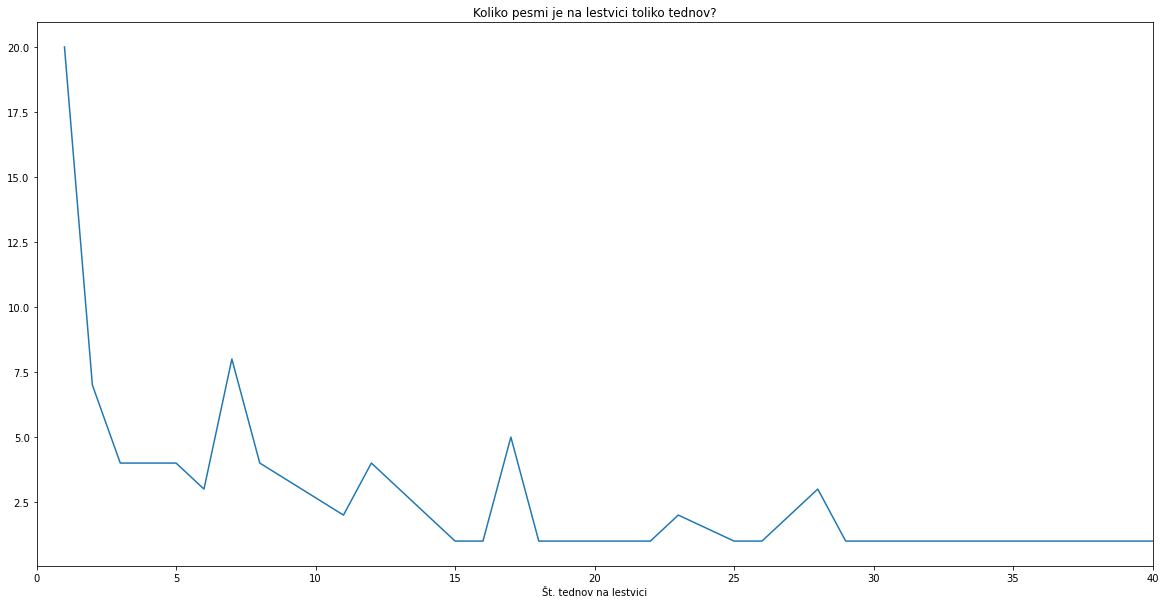

In [159]:
pesmi_po_tednih = pesmi.groupby("Št. tednov na lestvici")
pesmi_po_tednih.size().plot(figsize = (20,10), title = "Koliko pesmi je na lestvici toliko tednov?")
plt.xlim(0.0, 40.0)

In [138]:
pesmi_po_tednih.size().sort_values(ascending = False).mean()

2.5

S tem lahko potrdim hipotezo, da je največ pesmi popularnih le kratek čas. Povprečno število tednov pa je sicer še manjše, kot sem ga pričakovala.
Povprečna pesem je na lestvici namreč 2.5 tedna.
Rezultati so v skladu s pričakovanji: pop pesmi so narejene za več poslušanj naenkrat, a prav zaradi tega se jih ljudje zelo hitro naveličajo.
Tedenske lestvice se zato iz tedna v teden drastično spreminjajo.

In [139]:
pesmi_po_tednih.size().sort_values(ascending = False)

Št. tednov na lestvici
1      20
7       8
2       7
17      5
4       4
       ..
19      1
18      1
16      1
15      1
119     1
Length: 40, dtype: int64

In [140]:
pesmi[pesmi["Št. tednov na lestvici"] == 119]

,Naslov,Pevec,Št. tednov na lestvici,Glasbena založba,Top mesto,Število predvajanj
rank,,,,,,
72,Sunflower,Post Malone & Swae Lee,119,Republic,"Salt Lake City, UT",5.1M


Pesem, ki je ostala la lestvici že najdlje - 119 tednov, je "Sunflower", ki sta jo napisala Post Malone & Swae Lee.
Glede na to, da je bila ta pesem predvajana v izjemno popularnem filmu "Spider-Man: Into the Spider-Verse", je pričakovano,
da je še zmeraj ena izmed bolj poslušanih pesmi (kar si tudi objektivno zasluži).

---


### Število predvajanj v odvisnosti od spremenljivk

V tem podpoglavju se bom osredotočila na število predvajanj posamezne pesmi ter njeno odvisnost od tednov na lestvici ter mesta na lestvici.

**Hipoteza**: Menim, da število predvajanj in št. tednov na lestvici ne korelirata.

<AxesSubplot:title={'center':'Odvisnost števila predvajanj od števila tednov na lestvici'}, xlabel='Št. tednov na lestvici', ylabel='Število predvajanj'>

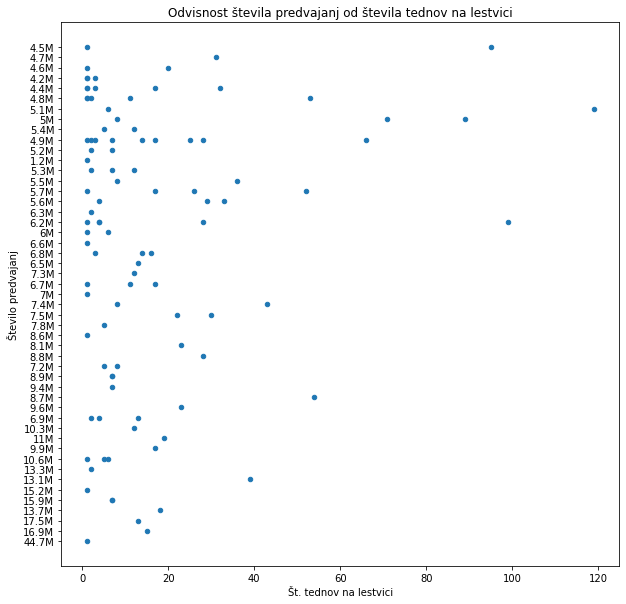

In [141]:
pesmi.plot.scatter("Št. tednov na lestvici", "Število predvajanj", figsize = (10,10), title = "Odvisnost števila predvajanj od števila tednov na lestvici")

Vidimo da število tednov na lestvici in število predvajanj nista odvisna, saj ni opazne nobene jasne povezanosti ali zgostitve.
Opazimo pa lahko, da je večina pesmi pogrupiranih na začetku grafa glede na x-os. To nam pove, da le redke pesmi na lestvici
ostanejo po več tednov, kar potrjuje tudi hipoteza v prejšnjem delu analize.

**Hipoteza**: Menim, da višje, kot je pesem na lestvici, več predvajanj bo imela.

<AxesSubplot:title={'center':'Odvisnost mesta od števila predvajanj'}, xlabel='Rank', ylabel='Število predvajanj'>

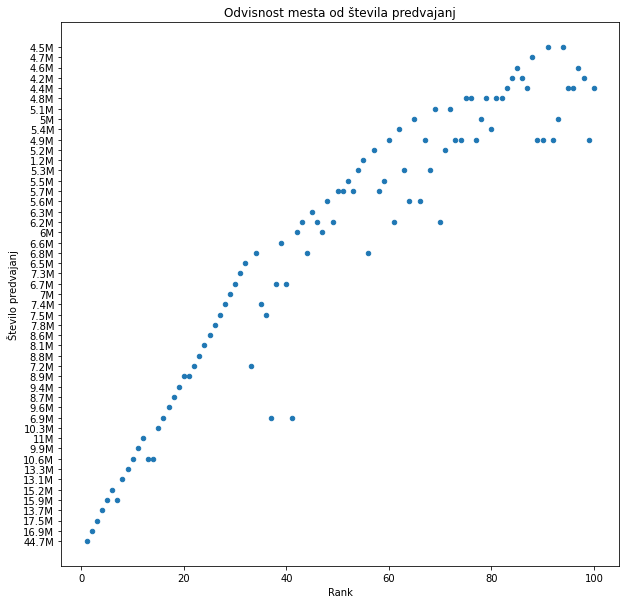

In [158]:
pesmi_z_rankom.columns = ["Rank", "Naslov", "Pevec", "Št. tednov na lestvici", "Glasbena založba", "Top mesto", "Število predvajanj"]
pesmi_z_rankom.plot.scatter("Rank", "Število predvajanj", figsize = (10,10), title = "Odvisnost mesta od števila predvajanj")

S tem hipotezo lahko potrdimo, saj je naraščajoč linearen trend očiten. Pri tem moramo biti pozorni, da
so na y-osi vrednosti padajoče in ne naraščajoče, kot bi bilo tipično pričakovati. Torej dlje časa, kot
je pesem na lestvici, manjše je njeno število predvajanj.

### Adele

Oglejmo si graf s padajočim številom pesmi glede na pevce, ki so izdali to pesem:

<AxesSubplot:title={'center':'Število pesmi glede na pevca'}>

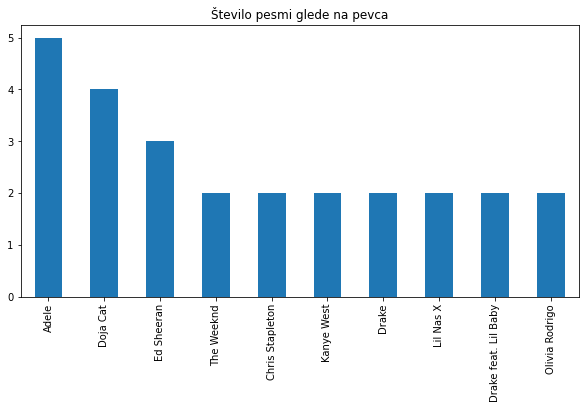

In [161]:
stevec_pevcev = pesmi["Pevec"].value_counts()
stevec_pevcev[:10].plot.bar(figsize = (10, 5), title = "Število pesmi glede na pevca")

In [162]:
pesmi[pesmi["Pevec"] == "Adele"]

,Naslov,Pevec,Št. tednov na lestvici,Glasbena založba,Top mesto,Število predvajanj
rank,,,,,,
1,Easy on Me,Adele,1,Columbia Records,"Boston, MA (Manchester, NH)",44.7M
47,When We Were Young,Adele,1,XL Recordings/Columbia,"Boston, MA (Manchester, NH)",6M
53,Someone Like You,Adele,1,XL Recordings/Columbia,"Philadelphia, PA",5.7M
85,Rolling In The Deep,Adele,1,XL Recordings/Columbia,"Boston, MA (Manchester, NH)",4.6M
100,Love in the Dark,Adele,1,XL Recordings/Columbia,"Columbia, SC",4.4M


Vidimo, da je ta teden na lestvici vodila Adele s kar petimi pesmimi med top 100. To je bilo na žalost pričakovano, saj je 15. 10. 2021 
kot promocijo novega albuma izdala svojo prvo pesem po petih letih tišine. Ker so se poslušalci spet spomnili, da Adele obstaja,
so radijske postaje začele vrteti tako njeno novo pesem kot tudi njene stare, preveč popularne pesmi. Zato se v tistem mesecu tako v Ameriki
kot tudi v Sloveniji nismo mogli izogniti njenim pesmim, ki so se predvajale vsake deset minut na katerikoli radijski postaji.

Doja Cat si objektivno zasluži vodilno mesto na lestvici.

Teja Čižman, februar 2022